                                        MVA - Kernel Methods for Machine Learning
                                        Code Challenge 
                                        Achari Berrada Youssef

In [12]:
## Import essential libraries : 
import pandas as pd 
import numpy as np 
%matplotlib inline  
import matplotlib.pyplot as plt 
# path to data 
path_to_data = '../Data/'

#### Upload the data : 

In [13]:
Xtr = pd.read_csv(path_to_data + 'Xtr.csv' , header = None )
Xte = pd.read_csv(path_to_data + 'Xte.csv' , header = None )
Ytr = pd.read_csv(path_to_data + 'Ytr.csv' , header = 0 )

#### Transform the data to arrays : 

In [14]:
## Delete unnecessary 
x_train = Xtr.drop(Xtr.columns[[3072]] , 1).values
x_test =  Xte.drop(Xte.columns[[3072]] , 1).values
y_train = np.array(Ytr[[1]].values).ravel()

#### Define the classes : 

In [15]:
classes = list(set(y_train)) 
map_classes = { 0:'Plane', 1:'Car', 2:'Bird', 3:'Cat',4:'Deer', 5:'Dog',6:'Frog',7:'Horse',8:'Boat',9:'Lorry'}
print "There is : "
for i in range(len(map_classes)): 
    print "{0} of the class {1} ({2})".format(np.sum(y_train == i) ,map_classes[i],i)

There is : 
500 of the class Plane (0)
500 of the class Car (1)
500 of the class Bird (2)
500 of the class Cat (3)
500 of the class Deer (4)
500 of the class Dog (5)
500 of the class Frog (6)
500 of the class Horse (7)
500 of the class Boat (8)
500 of the class Lorry (9)


#### Helpful functions to vizualize the images : 

In [16]:
def inv_preproc(l) : 
    # Function to rescale array in a channel  
    x = l / np.sqrt(np.var(l)) 
    x_ = x - np.min(x)
    x__ = x_ / (np.max(x_) - np.min(x_)) 
    x_im = x__ * 254 +1
    return x_im
def plot_img( l ) : 
    # Function to show the image 
    size_img  = 32 * 32 
    image_shape = (32,32)
    rgb_shape = (32,32,3) 
    rgb_array = np.zeros(rgb_shape)
    for i in range(3): 
        x = l[i*size_img :(i+1)*size_img]
        # Each channel is rescaled 
        channel = inv_preproc(x).reshape(image_shape)
        rgb_array[:,:,i] = np.array(channel,dtype=int)
    plt.imshow(rgb_array)
    plt.show()
    return rgb_array

In [20]:
def create_test_output(data=None,save=False,name='Yte'): 
    output = np.zeros((2000,2))
    output[:,0] = np.arange(1,2001)
    if data!=None :
        assert len(data) == N_TEST 
        output[:,1] = data
    output = np.int32(output)
    test_output = pd.DataFrame(output,columns=['Id','Prediction'])
    # Save test_output for submission
    if save :
        test_output.to_csv('../Output/'+ name+'.csv',sep=',',index=False)
    return test_output

In [21]:
create_test_output(save=True);

#### Visualize the images w.r.t  the classes on the training set :  

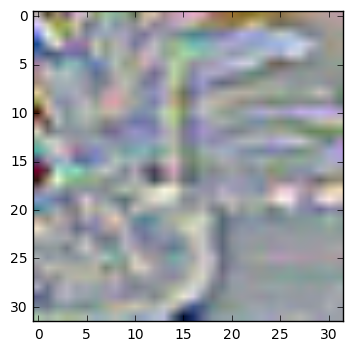

In [22]:
cla = 2
ind_cl = np.argwhere(y_train == cla).ravel()
i = np.random.randint(len(ind_cl))
plot_img(x_train[ind_cl[i]]);

#### Visualize the images on the test set : 

802


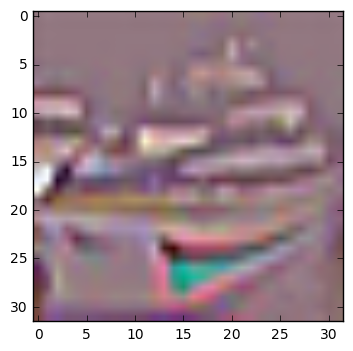

In [35]:
j = np.random.randint(x_test.shape[0])
print j ; 
plot_img(x_test[j-1]);